In [39]:
#Begin, as always, just by looking at the graphs
from ROOT import TFile, TCanvas, TH1D, TH2D, TF1, gPad , gStyle
from ROOT import kViridis, kBird, kCubehelix, kRainBow
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress 

 FCN=9080.38 FROM MIGRAD    STATUS=CONVERGED      92 CALLS          93 TOTAL
                     EDM=4.53954e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.44678e+03   2.86925e+01   8.82835e-01   4.74676e-06
   2  Mean         7.93734e+02   4.20993e-01   1.95686e-02   7.37442e-05
   3  Sigma        1.20729e+02   4.76904e-01   3.31702e-05   9.85838e-02


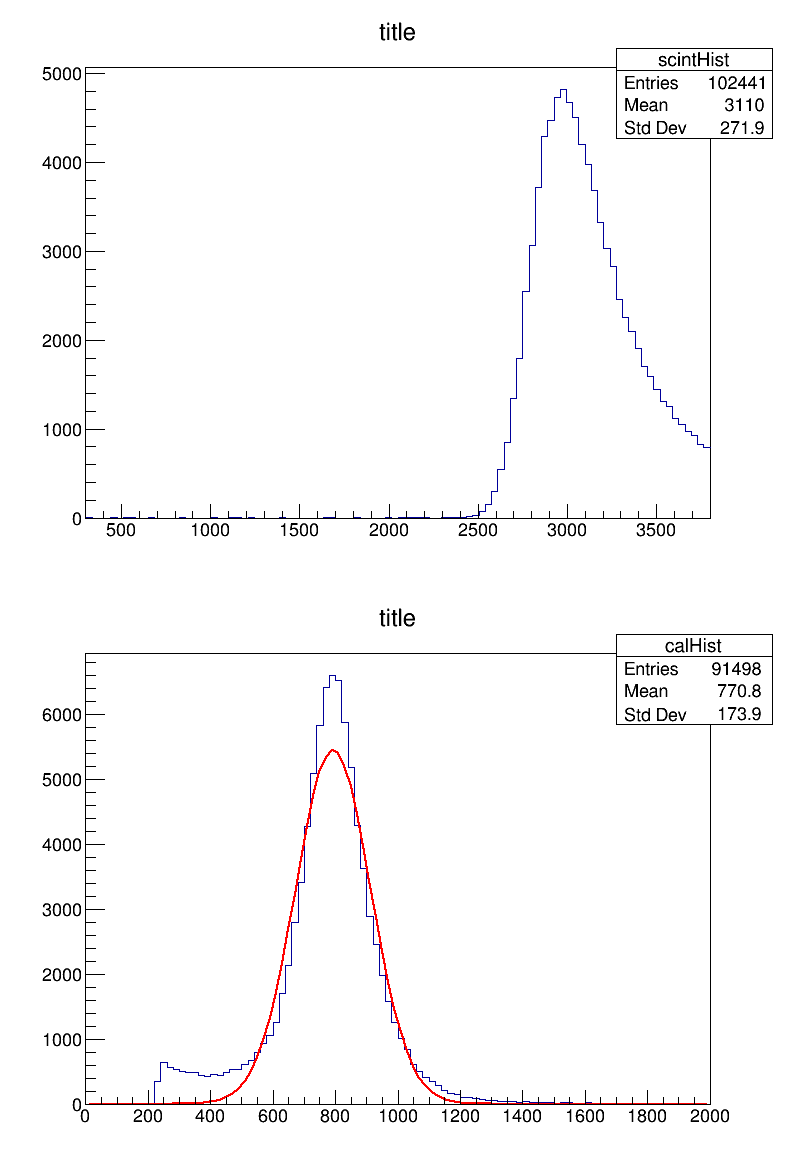

In [2]:
c1=TCanvas("Calo Plots", "CaloPlots", 800, 1200)
c1.Divide(1, 2)
c1.cd(1)
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")
scintHist=TH1D("scintHist", "title", 100, 300, 3800)
calHist=TH1D("calHist", "title", 100, 0, 2000)
RAWdata.Draw("QDC0_ch0>>scintHist")
scintHist.Draw()
c1.cd(2)
RAWdata.Draw("QDC0_ch2>>calHist", "QDC0_ch2>230")
calHist.Draw()
calHist.Fit("gaus")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Calo Plots


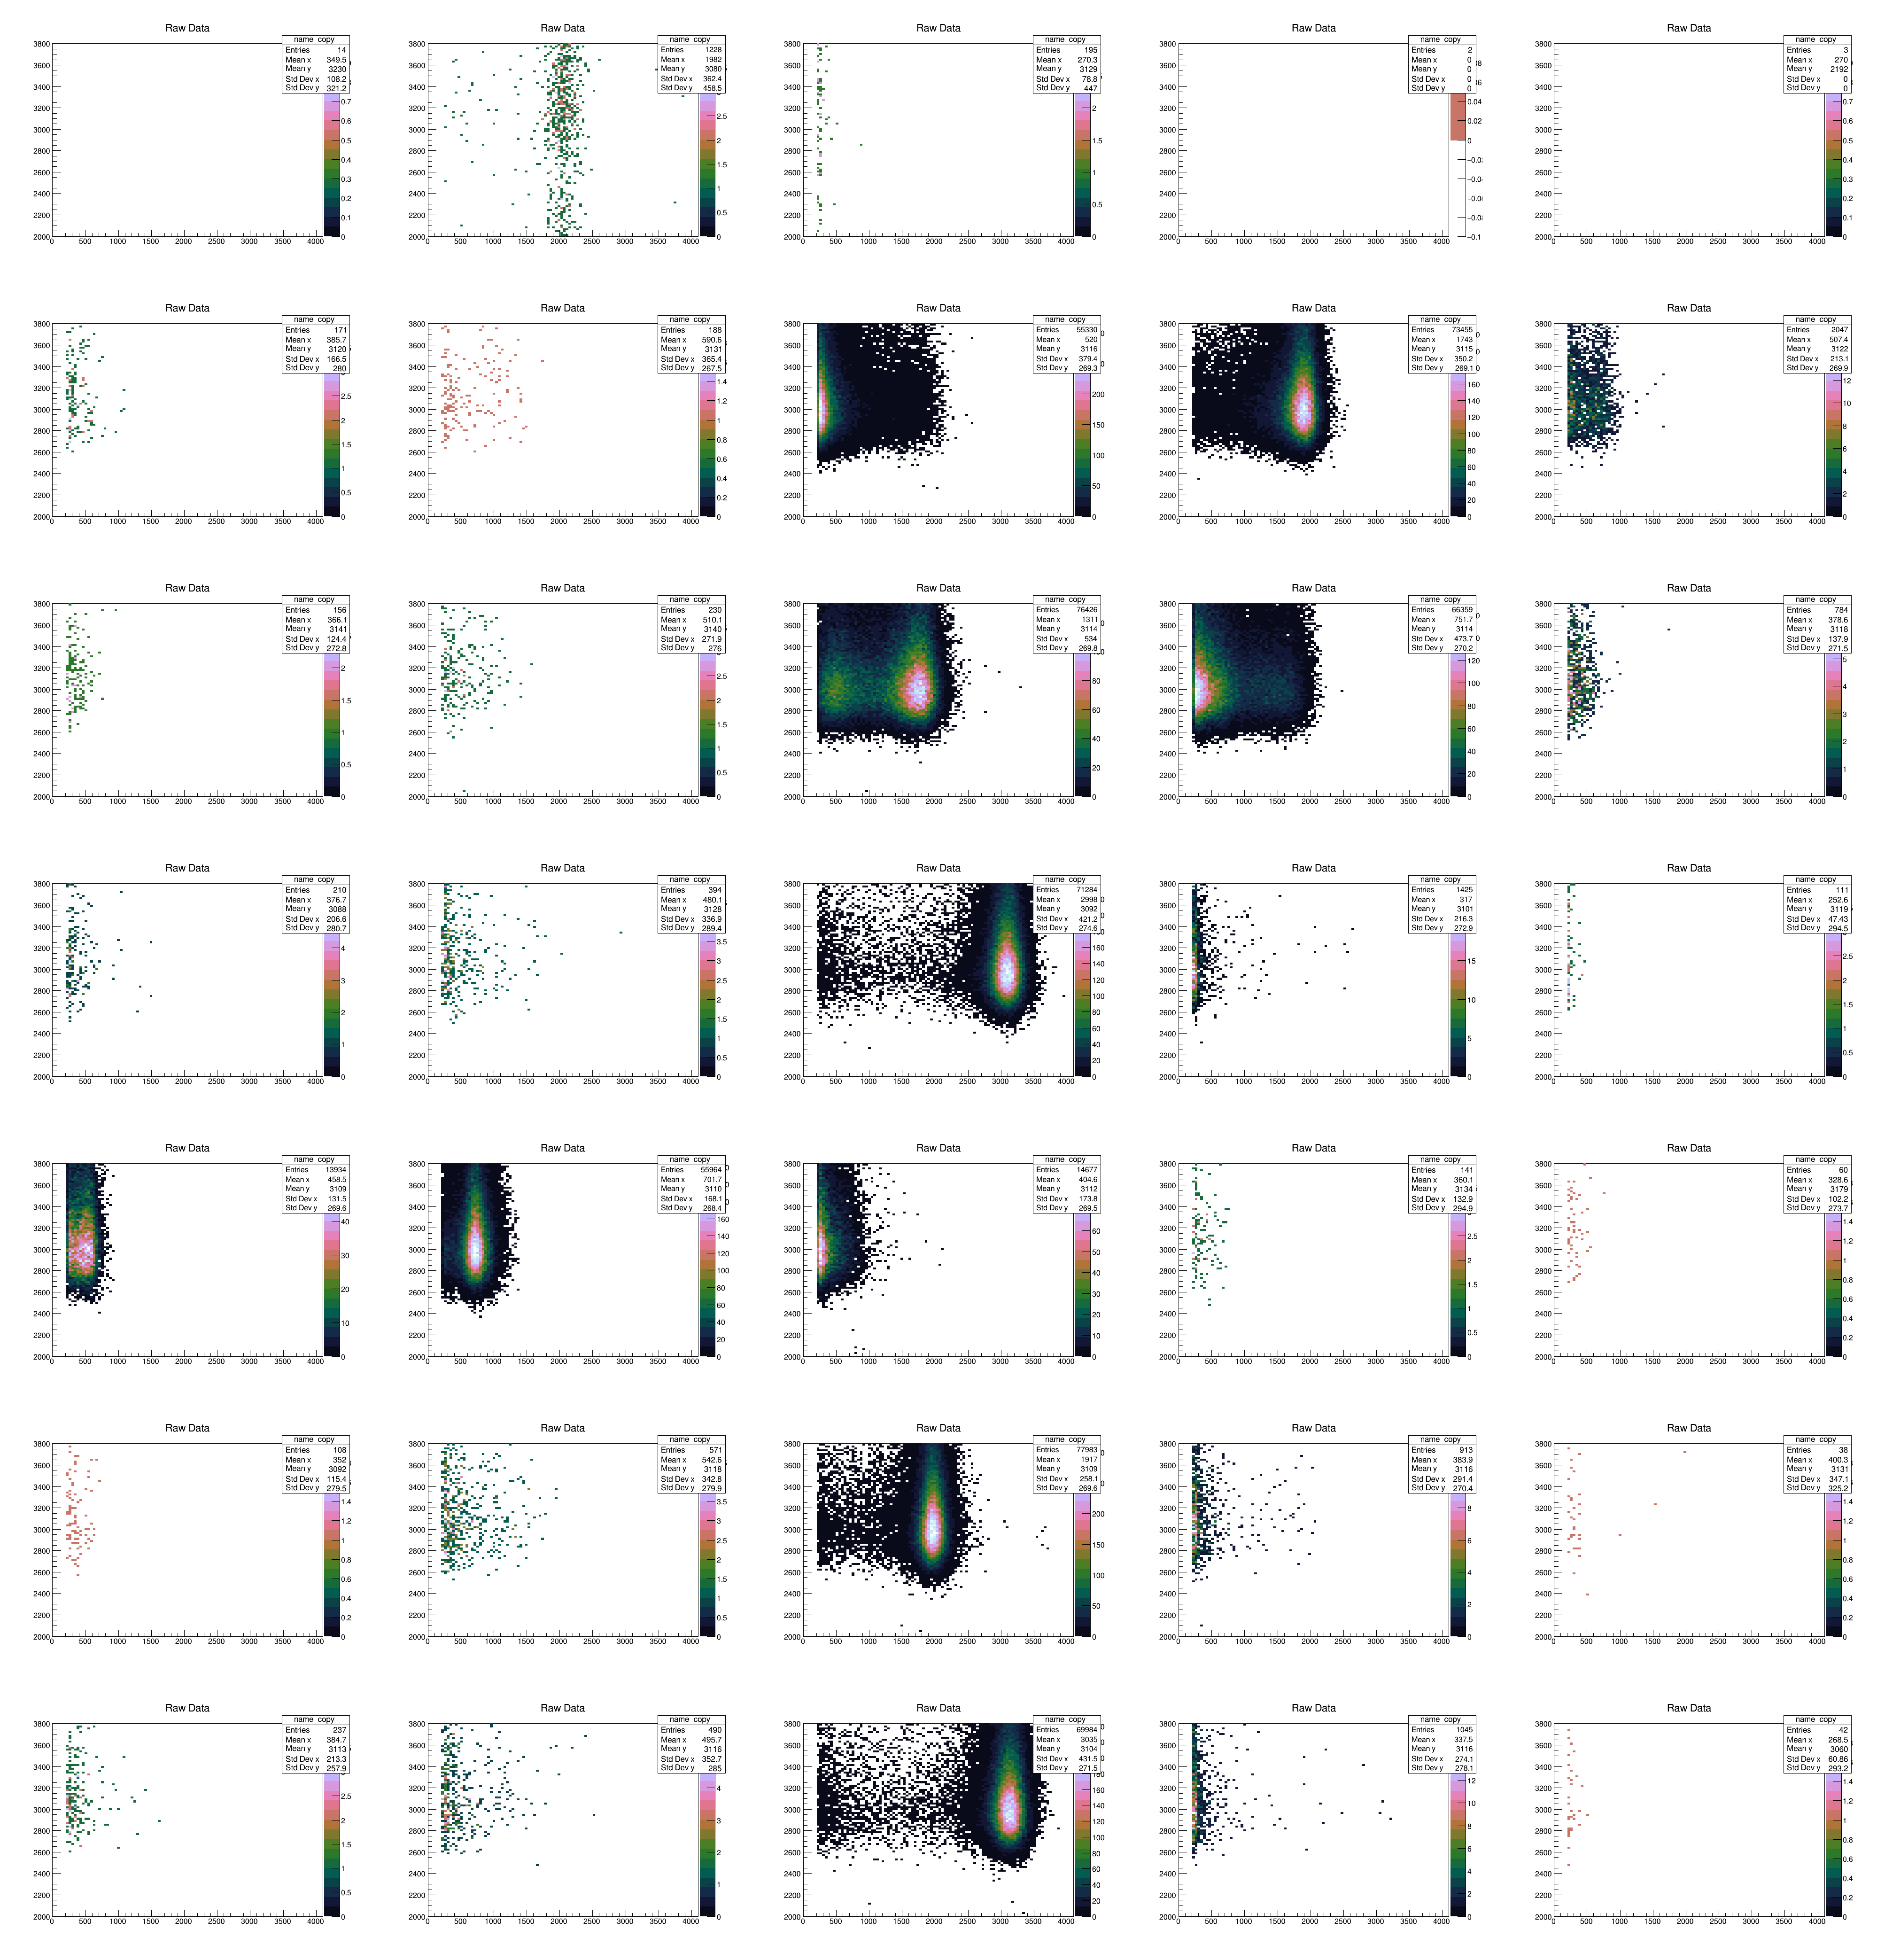

In [40]:
runNumbersE=["1571906107", 
             "1571933143", 
             "1571932668", 
             "1571934315",  
             "1571937854", 
             "1571939524", 
             "1571950975"]
#c1=TCanvas("Calo Plots", "CaloPlots", 4000, 600*math.ceiling(len(runNumbersE)/5))
c1=TCanvas("Calo Plots", "CaloPlots", 4000, len(runNumbersE)*600)
c1.Divide(5, len(runNumbersE))

direct=1
for run in runNumbersE:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH2D("name", "Raw Data", 100, 0, 4100, 100, 2000, 3800)
    for i in [5, 1, 2, 3, 4]:
        c1.cd(direct)
        RAWdata.Draw("QDC0_ch0:QDC0_ch"+str(i)+">>name", "QDC0_ch0>300 && QDC0_ch0<3800 && QDC0_ch" + str(i) + ">230")
        #gPad.SetLogz()
        gStyle.SetPalette(kCubehelix)
        hist1.DrawCopy("colz")
        direct+=1
    
c1.Draw()

In [4]:
#We want to think of the 5 calorimeters as one big one
#That means that for any event we add up the QDC data from all the calorimeters (above the pedestal)
#But each calorimters has a different PMT, so we can't add them straight up
#Rather, we do QCC1*K1+QDC2*K2+ ...

cutoff=230 #This is the pedestal for the QDC

#First, we want to make a linear regression of Calo 1
caloNum=1

calo1=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906107.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit("fitti") #Apply the gaussian fit
calo1+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906358.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo1+=[(5, fitti.GetParameter("Mean"))]

#Now a linear regression for Calo 2. We will follow the exact same format (copy paste), so all hard coded
caloNum=2

calo2=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906955.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo2+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571906677.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo2+=[(5, fitti.GetParameter("Mean"))]

#Now data for Calo 3
caloNum=3

calo3=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907163.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo3+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907343.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo3+=[(5, fitti.GetParameter("Mean"))]

#And data for Calo 4
caloNum=4

calo4=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907892.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo4+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571907628.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo4+=[(5, fitti.GetParameter("Mean"))]

#Then finally 5
caloNum=5

calo5=[] #Make an array to store the data
fitti=TF1("fitti", "gaus") #Make an object to store the data about the fit
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571905775.root", "READ") # 3 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff)) #Draw to the histogram, cutting of the pedestal
histC.Fit(fitti) #Apply the gaussian fit
calo5+=[(3, fitti.GetParameter("Mean"))] #Store to our list the (energy, mean)

#Then do it all over again with the 5 GeV data point
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571905465.root", "READ") # 5 GeV
RAWdata=importFile.Get("RAWdata")
histC=TH1D("histC", "Raw Data", 100, 0, 4100)

RAWdata.Draw("QDC0_ch" + str(caloNum) + ">>histC", "QDC0_ch" + str(caloNum) + ">" + str(cutoff))
histC.Fit(fitti)
calo5+=[(5, fitti.GetParameter("Mean"))]

 FCN=4174.92 FROM MIGRAD    STATUS=CONVERGED     149 CALLS         150 TOTAL
                     EDM=1.87656e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.61457e+03   3.46254e+01   8.03584e-01  -3.47866e-07
   2  Mean         2.02484e+03   6.43796e-01   2.02650e-02  -2.99795e-04
   3  Sigma        1.41581e+02   5.91316e-01   2.01733e-05  -2.35621e-03
 FCN=3752.73 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     EDM=1.38438e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.11801e+03   2.34641e+01  -2.34601e-02   3.35744e-06
   2  Mean         3.28363e+03   9.62981e-01  -5.93949e-04  -4.31778e-06
   3  Sigma        1

Warning in <Fit>: Abnormal termination of minimization.


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


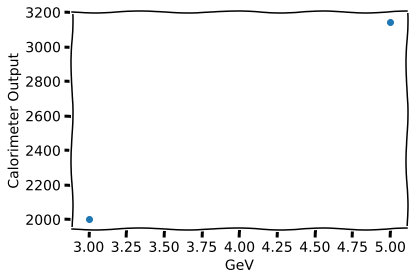

In [5]:
#Plot the 1 GeV one as an example
with plt.xkcd(): #Set the style of the plot
    plt.scatter([i[0] for i in calo2], [i[1] for i in calo2]) #[0] is the GeV and [1] is the mean hits
    plt.xlabel('GeV')
    plt.ylabel('Calorimeter Output')

for event in RAWData:
    getScint()
    getCalo()
    plot(x=calo, y=scint)

In [11]:
caloBration={} #We will have a dictionary referenced by calo number (QDC channel) with a tuple (slope, intercept)
                #Using the scipy library linear regression formula
calo1data=linregress([i[0] for i in calo1], [i[1] for i in calo1])
caloBration[1]=(calo1data[0], calo1data[1])

calo2data=linregress([i[0] for i in calo2], [i[1] for i in calo2])
caloBration[2]=(calo2data[0], calo2data[1])

calo3data=linregress([i[0] for i in calo3], [i[1] for i in calo3])
caloBration[3]=(calo3data[0], calo3data[1])

calo4data=linregress([i[0] for i in calo4], [i[1] for i in calo4])
caloBration[4]=(calo4data[0], calo4data[1])

calo5data=linregress([i[0] for i in calo5], [i[1] for i in calo5])
caloBration[5]=(calo5data[0], calo5data[1])

print(caloBration)

{1: (629.3930700079324, 136.66105057851973), 2: (572.3515930055929, 282.4112271480262), 3: (596.3904889914934, 258.9064331998143), 4: (617.1951018960285, 204.58782491750617), 5: (622.9660569209548, 20.809737867456533)}


In [13]:
hi=RAWdata.TEventList()

AttributeError: 'TTree' object has no attribute 'TEventList'

In [ ]:
hi=RAWdata.Draw()